# Week 3 Solutions
### By Ethan Iwama

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up notebook to show all outputs in a cell, not only last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [2]:
# Reading the Data
print(df.head())
print()
print('-----o-----')
print()
print(df.tail())
print()
print('-----o-----')
print()
print(df.info()) # nulls in weather_summary, temperature, precipitation, events

           hour_beginning         location  Pedestrians  Towards Manhattan  \
0  04/30/2019 12:00:00 AM  Brooklyn Bridge            3                  3   
1  12/31/2019 10:00:00 PM  Brooklyn Bridge           10                  9   
2  12/31/2019 11:00:00 PM  Brooklyn Bridge            2                  0   
3  12/31/2019 09:00:00 PM  Brooklyn Bridge           12                  0   
4  04/01/2019 03:00:00 AM  Brooklyn Bridge            1                  0   

   Towards Brooklyn weather_summary  temperature  precipitation        lat  \
0                 0             NaN          NaN            NaN  40.708164   
1                 1          cloudy         42.0         0.0005  40.708164   
2                 2          cloudy         42.0         0.0004  40.708164   
3                12          cloudy         42.0         0.0036  40.708164   
4                 1     clear-night         36.0         0.0000  40.708164   

        long events                              Location1  
0

### Data Clarification

In [3]:
# Separating the hour_beginning into date, month, day, hour
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

df['date'] = df.hour_beginning.dt.date
df['year'] = df.hour_beginning.dt.year
df['month'] = df.hour_beginning.dt.month
df['day'] = df.hour_beginning.dt.day_name()
df['hour'] = df.hour_beginning.dt.hour

print(df.head())
print()
print('-----o-----')
print()
print(df.info())

C:\Users\ethiwam_work\AppData\Local\Temp\ipykernel_21560\291249489.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


       hour_beginning         location  Pedestrians  Towards Manhattan  \
0 2019-04-30 00:00:00  Brooklyn Bridge            3                  3   
1 2019-12-31 22:00:00  Brooklyn Bridge           10                  9   
2 2019-12-31 23:00:00  Brooklyn Bridge            2                  0   
3 2019-12-31 21:00:00  Brooklyn Bridge           12                  0   
4 2019-04-01 03:00:00  Brooklyn Bridge            1                  0   

   Towards Brooklyn weather_summary  temperature  precipitation        lat  \
0                 0             NaN          NaN            NaN  40.708164   
1                 1          cloudy         42.0         0.0005  40.708164   
2                 2          cloudy         42.0         0.0004  40.708164   
3                12          cloudy         42.0         0.0036  40.708164   
4                 1     clear-night         36.0         0.0000  40.708164   

        long events                              Location1        date  year  \
0 -73.

### Cleaning and Validation
#### Check for Nulls

In [4]:
# Checking data is complete
print(df.isnull().sum())

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary         16
temperature             16
precipitation           16
lat                      0
long                     0
events               14933
Location1                0
date                     0
year                     0
month                    0
day                      0
hour                     0
dtype: int64


#### Verifying Numerical Data

In [5]:
# Checking numerical data (min/max)
min_dt = df.hour_beginning.min()
max_dt = df.hour_beginning.max()
print('Min -> Max')
print(min_dt)
print(max_dt)

expected_range = pd.date_range(start = min_dt, end = max_dt, freq='h')
print()
print('Expected Range')
print(expected_range)

missing_hours = expected_range.difference(df.hour_beginning)
print()
print('Missing Hours')
print(missing_hours)

Min -> Max
2017-10-01 00:00:00
2019-12-31 23:00:00

Expected Range
DatetimeIndex(['2017-10-01 00:00:00', '2017-10-01 01:00:00',
               '2017-10-01 02:00:00', '2017-10-01 03:00:00',
               '2017-10-01 04:00:00', '2017-10-01 05:00:00',
               '2017-10-01 06:00:00', '2017-10-01 07:00:00',
               '2017-10-01 08:00:00', '2017-10-01 09:00:00',
               ...
               '2019-12-31 14:00:00', '2019-12-31 15:00:00',
               '2019-12-31 16:00:00', '2019-12-31 17:00:00',
               '2019-12-31 18:00:00', '2019-12-31 19:00:00',
               '2019-12-31 20:00:00', '2019-12-31 21:00:00',
               '2019-12-31 22:00:00', '2019-12-31 23:00:00'],
              dtype='datetime64[ns]', length=19728, freq='h')

Missing Hours
DatetimeIndex(['2018-08-01 00:00:00', '2018-08-01 01:00:00',
               '2018-08-01 02:00:00', '2018-08-01 03:00:00',
               '2018-08-01 04:00:00', '2018-08-01 05:00:00',
               '2018-08-01 06:00:00', '2018

#### Organize Data

In [6]:
# Organizing data by time
df = df.sort_values(by='hour_beginning')
df.reset_index(drop=True, inplace=True)

print(df.head())
print()
print('-----o------')
print()
print(df.tail())

       hour_beginning         location  Pedestrians  Towards Manhattan  \
0 2017-10-01 00:00:00  Brooklyn Bridge           44                 30   
1 2017-10-01 01:00:00  Brooklyn Bridge           30                 17   
2 2017-10-01 02:00:00  Brooklyn Bridge           25                 13   
3 2017-10-01 03:00:00  Brooklyn Bridge           20                 11   
4 2017-10-01 04:00:00  Brooklyn Bridge           18                 10   

   Towards Brooklyn      weather_summary  temperature  precipitation  \
0                14          clear-night         52.0         0.0001   
1                13  partly-cloudy-night         53.0         0.0002   
2                12  partly-cloudy-night         52.0         0.0000   
3                 9  partly-cloudy-night         51.0         0.0000   
4                 8  partly-cloudy-night         51.0         0.0000   

         lat       long events                              Location1  \
0  40.708164 -73.999509    NaN  (40.7081639691088

#### Filling Nulls

In [7]:
# Filling in missing data
df.weather_summary = df.weather_summary.fillna(method='ffill')
df.temperature = df.temperature.fillna(method='ffill')
df.precipitation = df.precipitation.fillna(method='ffill')

print(df.isnull().sum())

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary          0
temperature              0
precipitation            0
lat                      0
long                     0
events               14933
Location1                0
date                     0
year                     0
month                    0
day                      0
hour                     0
dtype: int64


C:\Users\ethiwam_work\AppData\Local\Temp\ipykernel_21560\831355904.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.weather_summary = df.weather_summary.fillna(method='ffill')
C:\Users\ethiwam_work\AppData\Local\Temp\ipykernel_21560\831355904.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.temperature = df.temperature.fillna(method='ffill')
C:\Users\ethiwam_work\AppData\Local\Temp\ipykernel_21560\831355904.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.precipitation = df.precipitation.fillna(method='ffill')


#### Numerical Validation

In [8]:
# Expectation for Numericals
df.describe()

,hour_beginning,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long,year,month,hour
count,16057,16057.000000,16057.000000,16057.000000,16057.000000,16057.000000,1.605700e+04,1.605700e+04,16057.000000,16057.000000,16057.000000
mean,2018-11-22 23:25:25.913931776,687.106309,334.772436,352.286853,53.205892,0.004613,4.070816e+01,-7.399951e+01,2018.408109,6.347076,11.499346
min,2017-10-01 00:00:00,0.000000,0.000000,0.000000,2.000000,0.000000,4.070816e+01,-7.399951e+01,2017.000000,1.000000,0.000000
25%,2018-03-17 06:00:00,16.000000,9.000000,5.000000,39.000000,0.000000,4.070816e+01,-7.399951e+01,2018.000000,3.000000,5.000000
50%,2019-01-31 12:00:00,227.000000,112.000000,111.000000,53.000000,0.000000,4.070816e+01,-7.399951e+01,2019.000000,6.000000,11.000000
75%,2019-07-17 18:00:00,1254.000000,611.000000,632.000000,69.000000,0.000000,4.070816e+01,-7.399951e+01,2019.000000,10.000000,17.000000
max,2019-12-31 23:00:00,4330.000000,3657.000000,2872.000000,97.000000,0.680400,4.070816e+01,-7.399951e+01,2019.000000,12.000000,23.000000
std,NaN,862.244605,417.807545,456.624509,18.036476,0.023389,5.762681e-12,1.124114e-11,0.718755,3.544812,6.922682


#### Non-Numerical Validation

In [9]:
# Expectation for Non-Numericals
print(df.weather_summary.value_counts())
print()
print('-----o-----')
print()
print(df.events.value_counts())

weather_summary
clear-night            3755
partly-cloudy-day      3169
clear-day              3127
partly-cloudy-night    2508
cloudy                 2383
rain                    920
snow                     93
fog                      76
sleet                    14
wind                     12
Name: count, dtype: int64

-----o-----

events
Valentine's Day                       48
Martin Luther King Jr. Day            48
Mother's Day                          48
Cinco de Mayo                         48
Tax Day                               48
Easter Sunday                         48
St. Patrick's Day                     48
Daylight Saving Time starts           48
Presidents' Day (regional holiday)    48
Halloween                             48
New Year's Day                        48
Father's Day                          48
New Year's Eve                        48
Christmas Day                         48
Christmas Eve                         48
Black Friday                          48
T

#### Data Relationships

In [10]:
# Checking the relationships between data columns
print('Weather vs Temperature:')
df.groupby('weather_summary')['temperature'].describe()
print('Weather vs Precipitation:')
df.groupby('weather_summary')['precipitation'].describe()

print('Month vs Temperature:')
df.groupby('month')['temperature'].describe()
print('Hour vs Temperature:')
df.groupby('hour')['temperature'].describe()

Weather vs Temperature:


,count,mean,std,min,25%,50%,75%,max
weather_summary,,,,,,,,
clear-day,3127.0,55.501439,19.385883,3.0,40.00,56.0,72.0,94.0
clear-night,3755.0,46.256991,18.233019,2.0,33.00,43.0,62.0,90.0
cloudy,2383.0,52.595468,13.517349,18.0,41.00,53.0,63.0,83.0
fog,76.0,43.605263,12.847909,19.0,31.00,44.0,54.0,69.0
partly-cloudy-day,3169.0,61.707794,18.044045,4.0,46.00,65.0,77.0,97.0
partly-cloudy-night,2508.0,51.532695,16.347082,4.0,38.00,51.0,67.0,87.0
rain,920.0,54.010870,12.940472,32.0,42.00,54.0,64.0,86.0
sleet,14.0,33.642857,1.150728,32.0,33.00,33.5,34.0,36.0
snow,93.0,31.182796,3.925796,17.0,31.00,32.0,33.0,39.0


Weather vs Precipitation:


,count,mean,std,min,25%,50%,75%,max
weather_summary,,,,,,,,
clear-day,3127.0,0.000235,0.001193,0.0000,0.000000,0.0000,0.000000,0.0241
clear-night,3755.0,0.000055,0.000455,0.0000,0.000000,0.0000,0.000000,0.0157
cloudy,2383.0,0.001705,0.005100,0.0000,0.000000,0.0000,0.000500,0.1090
fog,76.0,0.003432,0.005740,0.0000,0.000000,0.0009,0.003650,0.0246
partly-cloudy-day,3169.0,0.000839,0.002985,0.0000,0.000000,0.0000,0.000000,0.0480
partly-cloudy-night,2508.0,0.000904,0.003619,0.0000,0.000000,0.0000,0.000000,0.1000
rain,920.0,0.065898,0.071727,0.0006,0.025500,0.0433,0.080150,0.6804
sleet,14.0,0.061729,0.066759,0.0089,0.029025,0.0399,0.056975,0.2284
snow,93.0,0.025419,0.030711,0.0013,0.011500,0.0168,0.026700,0.2029


Month vs Temperature:


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,1488.0,31.140457,11.459811,2.0,24.0,31.0,39.00,60.0
2,1344.0,37.706101,9.723386,10.0,31.0,37.0,43.00,75.0
3,1488.0,39.809140,7.925757,18.0,34.0,39.0,45.00,69.0
4,1440.0,50.865278,9.304510,31.0,43.0,51.0,57.25,79.0
5,1488.0,63.358199,9.183699,43.0,56.0,63.0,69.00,90.0
6,1440.0,71.056250,7.499476,52.0,66.0,71.0,76.00,91.0
7,1488.0,77.695565,6.300003,62.0,73.0,77.0,82.00,97.0
8,744.0,74.668011,5.929941,61.0,71.0,74.0,79.00,90.0
9,720.0,69.451389,6.882513,50.0,64.0,69.0,74.00,88.0


Hour vs Temperature:


,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,669.0,51.230194,17.075762,5.0,37.0,52.0,67.0,86.0
1,670.0,50.617910,16.990729,4.0,37.0,51.0,66.0,85.0
2,669.0,50.067265,16.900022,3.0,36.0,50.0,65.0,84.0
3,669.0,49.538117,16.860571,3.0,36.0,50.0,64.0,83.0
4,669.0,49.049327,16.771776,3.0,35.0,50.0,64.0,82.0
5,669.0,48.606876,16.708742,2.0,35.0,49.0,63.0,82.0
6,669.0,48.330344,16.668034,2.0,35.0,49.0,63.0,81.0
7,669.0,48.627803,16.997460,2.0,34.0,49.0,64.0,83.0
8,669.0,49.760837,17.303981,3.0,36.0,50.0,65.0,85.0


## Problem Solutions
### Problem 1
#### ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [11]:
print(df.columns)

Index(['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan',
       'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'Location1', 'date', 'year', 'month', 'day',
       'hour'],
      dtype='object')


In [12]:
# Collect datapoints on weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_filtered = df[df.day.isin(weekdays)]

# Double checking it got the values
print(df_filtered.day.value_counts())
print()
print('-----o-----')
print()
df_filtered.Pedestrians.describe()

day
Tuesday      2328
Monday       2304
Wednesday    2280
Thursday     2280
Friday       2280
Name: count, dtype: int64

-----o-----



count    11472.000000
mean       622.929393
std        758.226266
min          0.000000
25%         15.000000
50%        228.000000
75%       1159.000000
max       4141.000000
Name: Pedestrians, dtype: float64

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Number of Pedestrians by Weekday')

Text(0.5, 0, 'Weekday')

Text(0, 0.5, 'Pedestrians')

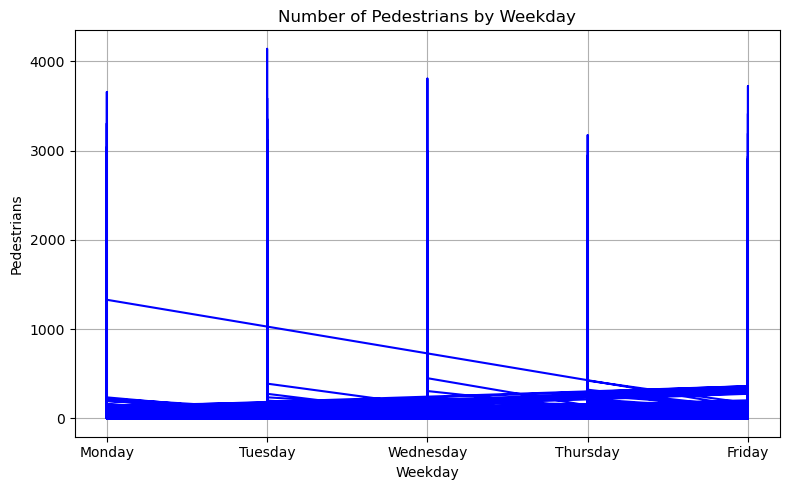

In [13]:
# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(df_filtered['day'], df_filtered['Pedestrians'], color='blue')

# Formatting
plt.title('Number of Pedestrians by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Pedestrians')
plt.tight_layout()
plt.grid()

plt.show()

I'm not liking that last plot. I'm going to also plot weekday pedestrians over time.

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Weekday Pedestrians Over Time')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Pedestrians')

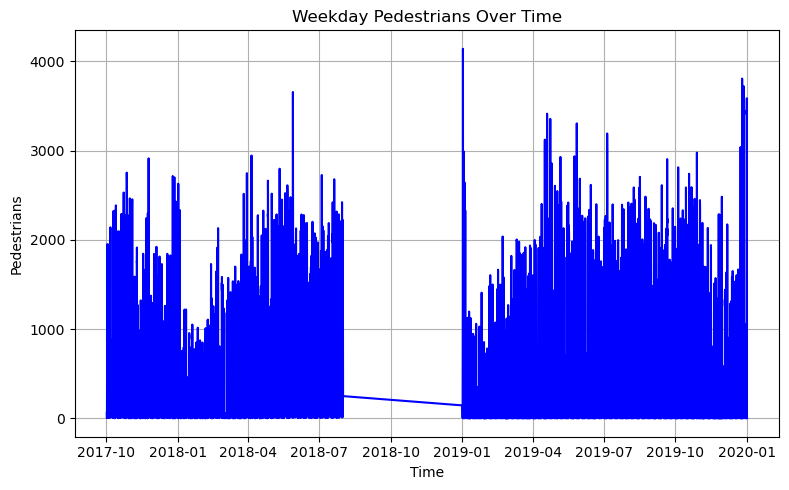

In [14]:
# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(df_filtered['hour_beginning'], df_filtered['Pedestrians'], color='blue')

# Formatting
plt.title('Weekday Pedestrians Over Time')
plt.xlabel('Time')
plt.ylabel('Pedestrians')
plt.tight_layout()
plt.grid()

plt.show()

### Problem 2
#### Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

- This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.

- Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.

In [15]:
print(df.columns)

Index(['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan',
       'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'Location1', 'date', 'year', 'month', 'day',
       'hour'],
      dtype='object')


In [16]:
# Collecting the 2019 data
df_filtered = df[df.year == 2019]

# Checking it was filtered properly
print(df_filtered.info())
print()
df_filtered.year.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8761 entries, 7296 to 16056
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     8761 non-null   datetime64[ns]
 1   location           8761 non-null   object        
 2   Pedestrians        8761 non-null   int64         
 3   Towards Manhattan  8761 non-null   int64         
 4   Towards Brooklyn   8761 non-null   int64         
 5   weather_summary    8761 non-null   object        
 6   temperature        8761 non-null   float64       
 7   precipitation      8761 non-null   float64       
 8   lat                8761 non-null   float64       
 9   long               8761 non-null   float64       
 10  events             572 non-null    object        
 11  Location1          8761 non-null   object        
 12  date               8761 non-null   object        
 13  year               8761 non-null   int32         
 14  month    

count    8761.0
mean     2019.0
std         0.0
min      2019.0
25%      2019.0
50%      2019.0
75%      2019.0
max      2019.0
Name: year, dtype: float64

In [17]:
print(df.weather_summary.value_counts())

weather_summary
clear-night            3755
partly-cloudy-day      3169
clear-day              3127
partly-cloudy-night    2508
cloudy                 2383
rain                    920
snow                     93
fog                      76
sleet                    14
wind                     12
Name: count, dtype: int64


In [18]:
# One-hot encoding the weather data
weather_mapping = {'clear-night':0, 'partly-cloudy-day':1, 'clear-day':2, 'partly-cloudy-night':3, 'cloudy':4, 'rain':5, 'snow':6, 'fog':7, 'sleet':8, 'wind':9}
df_filtered.weather_summary = df_filtered.weather_summary.replace(weather_mapping).infer_objects(copy=False)  # infer_objects necessary since Pandas is removing this type of
                                                                                                              # downcasting in the future.
# Checking
print(df_filtered.head())
print()
print('Null Values:')
print(df.weather_summary.isnull().sum())

          hour_beginning         location  Pedestrians  Towards Manhattan  \
7296 2019-01-01 00:00:00  Brooklyn Bridge          144                 24   
7297 2019-01-01 01:00:00  Brooklyn Bridge           39                 20   
7298 2019-01-01 02:00:00  Brooklyn Bridge           15                 10   
7299 2019-01-01 03:00:00  Brooklyn Bridge           14                 10   
7300 2019-01-01 04:00:00  Brooklyn Bridge            8                  6   

      Towards Brooklyn  weather_summary  temperature  precipitation  \
7296               120                5         46.0         0.1363   
7297                19                5         47.0         0.0490   
7298                 5                5         47.0         0.0279   
7299                 4                4         48.0         0.0044   
7300                 2                4         50.0         0.0003   

            lat       long          events  \
7296  40.708164 -73.999509  New Year's Day   
7297  40.708164 -7

C:\Users\ethiwam_work\AppData\Local\Temp\ipykernel_21560\2848475308.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered.weather_summary = df_filtered.weather_summary.replace(weather_mapping).infer_objects(copy=False)  # infer_objects necessary since Pandas is removing this type of
C:\Users\ethiwam_work\AppData\Local\Temp\ipykernel_21560\2848475308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.weather_summary = df_filtered.weather_summary.replace(weather_mapping).infer_objects(copy=False)  

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Between Pedestrians and Weather')

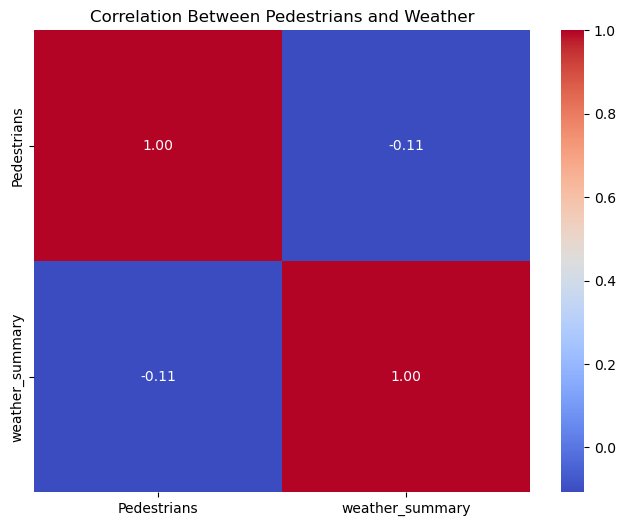

In [19]:
# Time to actually make a correlation matrix!
correlation_matrix = df_filtered[['Pedestrians', 'weather_summary']].corr()

# Plotting
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Pedestrians and Weather')
plt.show()

### Problem 3
#### ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.
- Students can also show plots analyzing activity.

In [20]:
def to_generaltime(hour):
    if hour >= 6 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 18:
        return 'Afternoon'
    elif hour >= 18 and hour < 21:
        return 'Evening'
    else:
        return 'Night'

# New column
df_new = df.copy()
df_new['general_time'] = df_new['hour'].apply(to_generaltime)

# Checking
print(df_new.head())
print()
print('-----o-----')
print()
print(df_new.info())

       hour_beginning         location  Pedestrians  Towards Manhattan  \
0 2017-10-01 00:00:00  Brooklyn Bridge           44                 30   
1 2017-10-01 01:00:00  Brooklyn Bridge           30                 17   
2 2017-10-01 02:00:00  Brooklyn Bridge           25                 13   
3 2017-10-01 03:00:00  Brooklyn Bridge           20                 11   
4 2017-10-01 04:00:00  Brooklyn Bridge           18                 10   

   Towards Brooklyn      weather_summary  temperature  precipitation  \
0                14          clear-night         52.0         0.0001   
1                13  partly-cloudy-night         53.0         0.0002   
2                12  partly-cloudy-night         52.0         0.0000   
3                 9  partly-cloudy-night         51.0         0.0000   
4                 8  partly-cloudy-night         51.0         0.0000   

         lat       long events                              Location1  \
0  40.708164 -73.999509    NaN  (40.7081639691088

In [21]:
# Checking at edge cases
print('Morning:')
print(df_new[df_new['hour'] == 6].general_time.head(1))
print(df_new[df_new['hour'] == 12].general_time.head(1))
print()

print('Afternoon:')
print(df_new[df_new['hour'] == 12].general_time.head(1))
print(df_new[df_new['hour'] == 18].general_time.head(1))
print()

print('Evening:')
print(df_new[df_new['hour'] == 18].general_time.head(1))
print(df_new[df_new['hour'] == 21].general_time.head(1))
print()

print('Night:')
print(df_new[df_new['hour'] == 21].general_time.head(1))
print(df_new[df_new['hour'] == 23].general_time.head(1))
print(df_new[df_new['hour'] == 0].general_time.head(1))
print(df_new[df_new['hour'] == 6].general_time.head(1))

Morning:
6    Morning
Name: general_time, dtype: object
12    Afternoon
Name: general_time, dtype: object

Afternoon:
12    Afternoon
Name: general_time, dtype: object
18    Evening
Name: general_time, dtype: object

Evening:
18    Evening
Name: general_time, dtype: object
21    Night
Name: general_time, dtype: object

Night:
21    Night
Name: general_time, dtype: object
23    Night
Name: general_time, dtype: object
0    Night
Name: general_time, dtype: object
6    Morning
Name: general_time, dtype: object


I'm going to make a bar graph showing the average pedestrians at each time of day.

In [22]:
df_new.columns

Index(['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan',
       'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'Location1', 'date', 'year', 'month', 'day',
       'hour', 'general_time'],
      dtype='object')

C:\Users\ethiwam_work\AppData\Local\Temp\ipykernel_21560\2291552089.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_counts = df_new.groupby('general_time')['Pedestrians'].mean()


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='general_time'>

Text(0.5, 1.0, 'Average Pedestrian Traffic During Different Times of Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Average Number of Pedestrians')

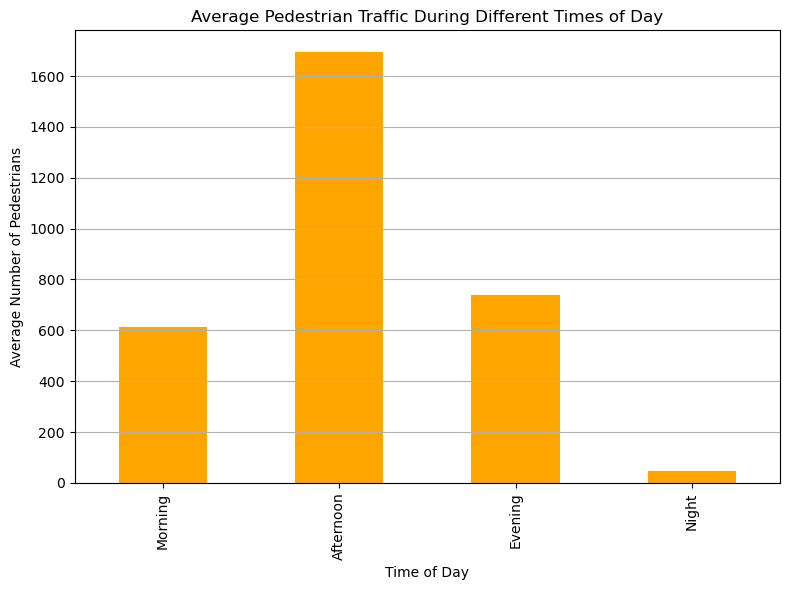

In [23]:
# Define the correct order of the times of day - so that they plot correctly
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
# Ensure general_time is categorical with the correct order
df_new['general_time'] = pd.Categorical(df_new['general_time'], categories=time_order, ordered=True)

# Creating the bar graph
time_counts = df_new.groupby('general_time')['Pedestrians'].mean()

plt.figure(figsize=(8,6))
time_counts.plot(kind='bar', color='orange')

plt.title('Average Pedestrian Traffic During Different Times of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of Pedestrians')

plt.grid(axis='y')
plt.tight_layout()
plt.show()